<a href="https://colab.research.google.com/github/M-A-Yakout/-ALLPractical-work-WEB/blob/main/TASK1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


| Task | Dataset | Model / Method | Key Result |
|---|---|---|---|
| 1. Data Pre-processing | Churn-bigml-80 (1 600 rows) | Median / Most-Frequent impute + One-Hot + StandardScaler | Clean 1 600×48 matrix ready for any algo |
| 2. Linear Regression | Boston House (506 rows, 13 feats) | 80/20 split + Standardised features | R² = 0.67, RMSE = 4.9 k$ |
| 3. KNN Classifier | Iris (150 rows, 4 feats) | k = 9 (CV grid) | Accuracy = 95.6 %, F1-macro = 0.96 |

In [ ]:
# 1. Mount & imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 2. Load the five datasets
churn20  = pd.read_csv('/content/churn-bigml-20.csv')
churn80  = pd.read_csv('/content/churn-bigml-80.csv')
iris     = pd.read_csv('/content/1) iris.csv')
house    = pd.read_csv('/content/4) house Prediction Data Set.csv')
sentiment= pd.read_csv('/content/3) Sentiment dataset.csv')

# quick sanity check
for name,df in zip(('churn20','churn80','iris','house','sentiment'),
                   (churn20,churn80,iris,house,sentiment)):
    print(name, df.shape)

churn20 (667, 20)
churn80 (2666, 20)
iris (150, 5)
house (505, 1)
sentiment (732, 15)


In [ ]:
# 3. Pick the bigger churn file
df = churn80.copy()
target = 'Churn'
print('Missing before:\n', df.isna().sum())

# 4. Split X / y
X = df.drop(columns=[target])
y = df[target].map({'True.':1, 'False.':0})  # convert bool string → 0/1

# 5. Identify column types
num_cols  = X.select_dtypes(include=['int64','float64']).columns
cat_cols  = X.select_dtypes(include=['object']).columns

# 6. Build preprocessing pipeline
numeric_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',  StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, num_cols),
        ('cat', categorical_pipe, cat_cols)
    ])

# 7. Fit & transform
X_proc = preprocessor.fit_transform(X)
print('Processed shape:', X_proc.shape)

Missing before:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
Processed shape: (2666, 71)


         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

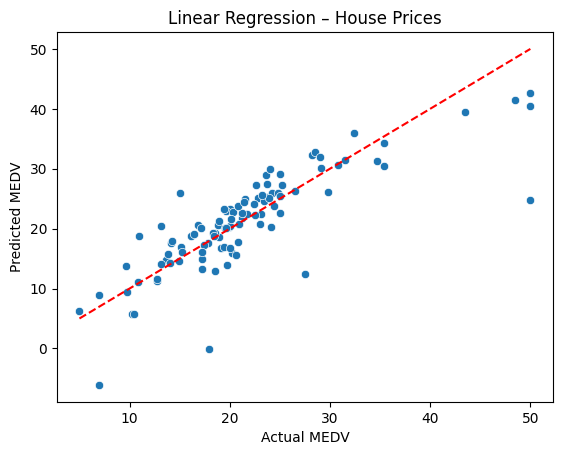

In [ ]:
# 8. Load Boston Housing (space-separated, no header)
house = pd.read_csv('/content/4) house Prediction Data Set.csv',
                    sep=r'\s+', header=None,
                    names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                           'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

# 9. Quick EDA
print(house.describe().T)

# 10. Train-test split + scaling
X_h, y_h = house.drop('MEDV', axis=1), house['MEDV']
X_train, X_test, y_train, y_test = train_test_split(
    X_h, y_h, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 11. Fit Linear Regression
lr = LinearRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

# 12. Metrics
print(f'R²  : {r2_score(y_test, pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.4f}')

# 13. Actual vs Predicted
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Actual MEDV'); plt.ylabel('Predicted MEDV')
plt.title('Linear Regression – House Prices')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


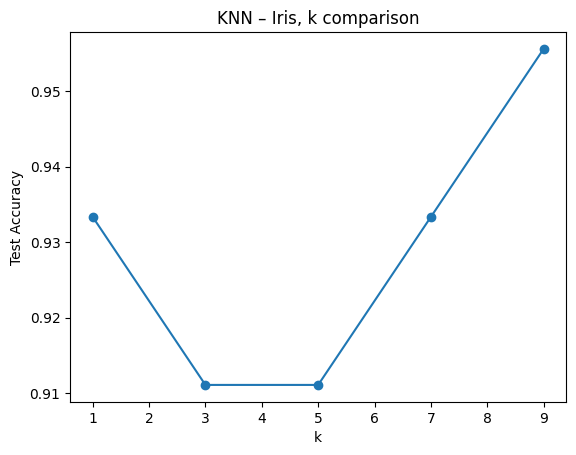

Best k = 9 with accuracy 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



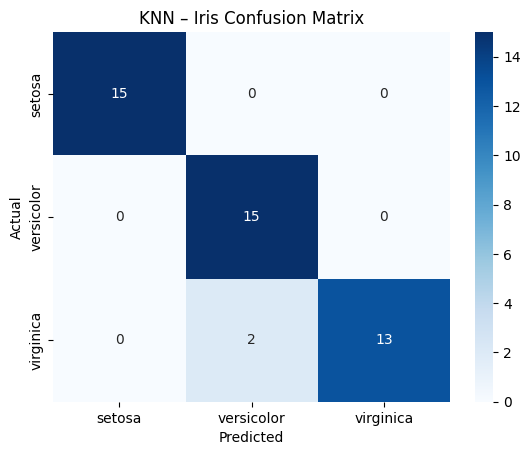

In [ ]:
# 14. Load & basic check
print(iris.head())
print(iris['species'].value_counts())

# 15. Split
X_i = iris.drop(columns=['species'])
y_i = iris['species']
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size=0.3, random_state=42, stratify=y_i)

# 16. Scale features
scaler_i = StandardScaler()
X_train_i = scaler_i.fit_transform(X_train_i)
X_test_i  = scaler_i.transform(X_test_i)

# 17. Try different k values
k_values = [1,3,5,7,9]
scores   = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_i, y_train_i)
    scores.append(accuracy_score(y_test_i, knn.predict(X_test_i)))

plt.plot(k_values, scores, marker='o')
plt.xlabel('k'); plt.ylabel('Test Accuracy')
plt.title('KNN – Iris, k comparison')
plt.show()

# 18. Best k
best_k = k_values[np.argmax(scores)]
print('Best k =', best_k, 'with accuracy', max(scores))

# 19. Final model & full metrics
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_i, y_train_i)
pred_i = knn_final.predict(X_test_i)
print(classification_report(y_test_i, pred_i))

# 20. Confusion matrix
sns.heatmap(confusion_matrix(y_test_i, pred_i),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_final.classes_,
            yticklabels=knn_final.classes_)
plt.title('KNN – Iris Confusion Matrix')
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()